In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

from random import uniform

TRAIN_SIZE = 200
VAL_SIZE = 50

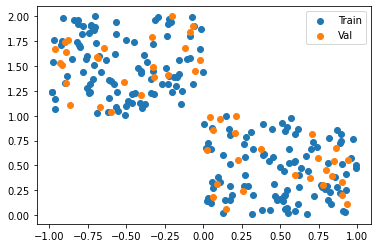

In [20]:
# Create train loader
x_arr = torch.rand(TRAIN_SIZE, 2)
x_arr[:int(TRAIN_SIZE/2), 0] -= 1
x_arr[:int(TRAIN_SIZE/2), 1] += 1

l1 = torch.zeros(int(TRAIN_SIZE/2)).unsqueeze(1)
l2 = torch.ones(TRAIN_SIZE - int(TRAIN_SIZE/2)).unsqueeze(1)
l_label = torch.cat((l1, l2))
dataset = Data.TensorDataset(x_arr, l_label)


train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)


# Create val loader
x_val = torch.rand(VAL_SIZE, 2)
x_val[:int(VAL_SIZE/2), 0] -= 1
x_val[:int(VAL_SIZE/2), 1] += 1

l1 = torch.zeros(int(VAL_SIZE/2)).unsqueeze(1)
l2 = torch.ones(VAL_SIZE - int(VAL_SIZE/2)).unsqueeze(1)
l_label = torch.cat((l1, l2))
dataset = Data.TensorDataset(x_val, l_label)

val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

# Plot
plt.scatter(x_arr[:, 0], x_arr[:, 1], label="Train")
plt.scatter(x_val[:, 0], x_val[:, 1], label="Val")
plt.legend()
plt.show()

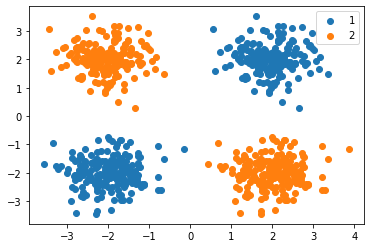

In [58]:
MEAN = 2

x_1 = torch.normal(-MEAN, 0.5, (TRAIN_SIZE, 2))
x_2 = torch.normal(MEAN, 0.5, (TRAIN_SIZE, 2))

x_1 = torch.cat((x_1, x_2))

x_2 = x_1.clone().detach()
x_2[:TRAIN_SIZE, 0] += 2 * MEAN
x_2[TRAIN_SIZE:, 0] -= 2 * MEAN


plt.scatter(x_1[:, 0], x_1[:, 1], label="1")
plt.scatter(x_2[:, 0], x_2[:, 1], label="2")
plt.legend()
plt.show()

In [61]:
l_1 = torch.zeros(TRAIN_SIZE * 2).unsqueeze(1)
l_2 = torch.ones(TRAIN_SIZE * 2).unsqueeze(1)
l_labels = torch.cat((l_1, l_2))
        
dataset = Data.TensorDataset(torch.cat((x_1, x_2)), l_labels)


train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)


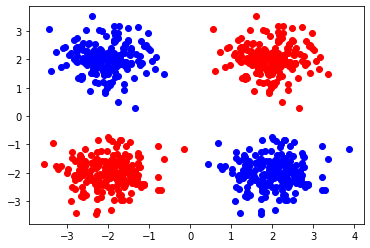

In [64]:
for point, label in zip(torch.cat((x_1, x_2)), l_labels):
    if label[0] < 0.5:
        plt.scatter(point[0], point[1], color="red")
    else:
        plt.scatter(point[0], point[1], color="blue")

In [65]:
env = Environment(8, train_loader, train_epochs=50, validation_loader=val_loader, in_shape=2)

cpu


In [66]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities()

Train ended in 54 s


[0.025107875186949968,
 0.000339450128194585,
 1.7351789546538044e-07,
 8.305874406232761e-05,
 0.00028066640026736423,
 0.007134357844479381,
 1.2839016401358094e-05,
 0.013768767472356558]

8 ['#0000ff', '#0024ed', '#0049db', '#006dc8', '#0092b6', '#00b6a4', '#00db92', '#00ff80']
[1] [0.025107875186949968] 0
[1] [0.000339450128194585] 1
[1] [1.7351789546538044e-07] 2
[1] [8.305874406232761e-05] 3
[1] [0.00028066640026736423] 4
[1] [0.007134357844479381] 5
[1] [1.2839016401358094e-05] 6
[1] [0.013768767472356558] 7


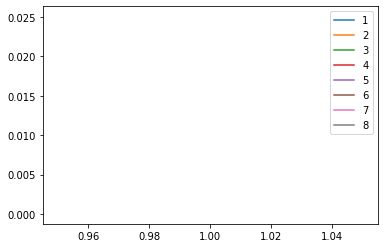

In [67]:
plot_env_history(env)

In [68]:
for i in range(5):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities()
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

1.7351789546538044e-07 2
1.2839016401358094e-05 6
8.305874406232761e-05 3
0.00028066640026736423 4
0.000339450128194585 1
Evo epoch 1 ended in 58 s
8.282857681063404e-08 2
8.597430678491946e-08 2
0.00010988661697410861 6
0.00012899083230877295 6
0.00019504397561831866 3
Evo epoch 2 ended in 66 s
1.1101363859289393e-08 2
5.849785190470414e-08 2
2.1893454807297988e-07 2
7.615830433849169e-07 2
1.0917913232333377e-05 6
Evo epoch 3 ended in 75 s
1.3405946557298876e-08 2
2.4895340273722864e-08 2
5.072235570224848e-08 2
8.850125574610956e-08 2
7.22137524178379e-07 2
Evo epoch 4 ended in 80 s
1.6940216177041558e-09 2
7.210142635716288e-09 2
9.242234461775967e-09 2
3.693271562354994e-08 2
3.73179869939122e-08 2
Evo epoch 5 ended in 80 s
3.378741674886498e-08 2
4.90618802295728e-08 2
6.082254492056904e-08 2
9.660843538483733e-08 2
1.756732702062891e-07 2
Evo epoch 6 ended in 82 s
3.5698921516669205e-08 2
3.713863540255602e-08 2
7.602966357822538e-08 2
1.0701957723568967e-07 2
2.925416595900288e

8 ['#0000ff', '#0024ed', '#0049db', '#006dc8', '#0092b6', '#00b6a4', '#00db92', '#00ff80']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [1.7351789546538044e-07, 8.597430678491946e-08, 7.615830433849169e-07, 1.3405946557298876e-08, 7.210142635716288e-09, 9.660843538483733e-08, 2.925416595900288e-07, 9.393585777672798e-08, 2.903768789197514e-08, 2.2450735277512735e-08, 1.3167816682368993e-07] 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [1.7351789546538044e-07, 8.282857681063404e-08, 2.1893454807297988e-07, 2.4895340273722864e-08, 1.6940216177041558e-09, 4.90618802295728e-08, 7.602966357822538e-08, 4.4104917544807165e-08, 5.967893567104809e-09, 3.406667260064111e-08, 5.588128214384369e-08] 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] [1.7351789546538044e-07, 8.597430678491946e-08, 7.615830433849169e-07, 1.3405946557298876e-08, 7.210142635716288e-09, 9.660843538483733e-08, 2.925416595900288e-07, 9.393585777672798e-08, 2.903768789197514e-08, 3.8637380954664735e-08, 5.683600287298418e-08] 2
[1, 2, 3, 4, 5, 6, 7, 

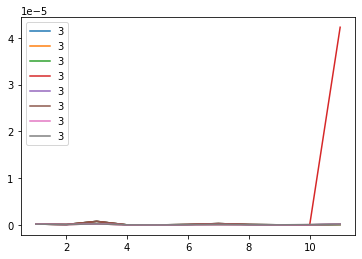

In [69]:
plot_env_history(env)

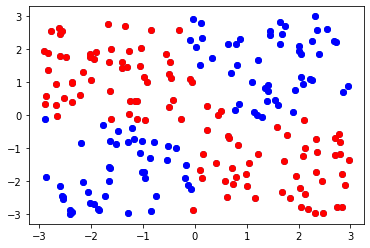

In [92]:
x = torch.rand(TRAIN_SIZE, 2) * 6 - 3
# x[:,1] +=1
plt.scatter(x[:, 0], x[:, 1], label="Test")
y_p = env.entities[5].predict(x).squeeze(1)
for point, prob in zip(x, y_p):
    if prob > 0.5:
        plt.scatter(point[0], point[1], color="red")
    else:
        plt.scatter(point[0], point[1], color="blue")
plt.show()

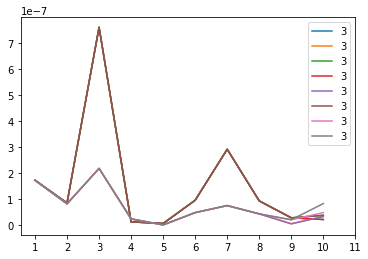

In [93]:
x = list(range(1, env.evo_epochs+1))
for entity in env.entities:
    plt.plot(x[:-1], entity.entity_history[:-1], label=entity.color+1)
plt.legend()
plt.xticks(x, x)
plt.show()

In [94]:
print(env.entities[5].gens)

{'layers': [{'type': 'Linear', 'in': 2, 'out': 36}, {'type': 'Tanh', 'in': 36, 'out': 36}, {'type': 'Sigmoid', 'in': 36, 'out': 36}, {'type': 'Linear', 'in': 36, 'out': 21}, {'type': 'Tanh', 'in': 21, 'out': 21}, {'type': 'Linear', 'in': 21, 'out': 27}, {'type': 'Tanh', 'in': 27, 'out': 27}, {'type': 'ReLU', 'in': 27, 'out': 27}, {'type': 'ReLU', 'in': 27, 'out': 27}, {'type': 'Linear', 'in': 27, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'name': 'Adam', 'lr': 0.016229702080622542}}
